In [1]:
# 导入包
# 用于加载波士顿房价数据集
from sklearn.datasets import load_boston 
# pandas工具包 对于pandas陌生的同学可以参考官方10分钟上手教程：https://pandas.pydata.org/pandas-docs/stable/10min.html
# panel data set
import pandas as pd 
# seaborn 用于画图
import seaborn as sns
import numpy as np # numpy
# 显示画图
%matplotlib inline

## step1:load data & data analysis

In [3]:
dataset = load_boston() # 加载数据集

In [4]:
dir(dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [11]:
dataset['feature_names'] # 特征名称

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
dataset['data'][:,0] #犯罪率

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

## Define the problem

### Assuming you were a real state salesperson in Boston 假设你是一个真正的房地产销售
### Given some description data about a real state => It's price 来一个买家或者卖家，你要知道这个房子大概多少钱

In [12]:
dataframe = pd.DataFrame(dataset['data'])
dataframe.head(5) # 查看dataframe的前5行，我们可以看到列名是数字

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
dataframe.columns = dataset['feature_names'] # 将数字列名替换为特征的名字
dataframe.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
dataframe['price'] = dataset['target'] # target为房价，也是我们的目标值，我们将目标值赋值给dataframe
dataframe.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [15]:
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Question:What's the most significant(salient)显著特征 feature in the huose price?

In [16]:
dataframe.corr() #相关系数

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


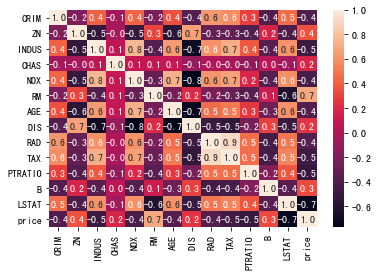

In [17]:
sns.heatmap(dataframe.corr(), annot=True, fmt='.1f') # 查看特征与price的相关性系数，正相关和负相关

## 基于以上分析，房屋里卧室个数和房价最成正相关

## 简单化：如何依据房屋里边卧室个数来估计房子的面积？

## 在1970s的时候，大家有一个这样的想法

In [22]:
X_rm = dataframe['RM'].values

In [23]:
Y = dataframe['price'].values

In [25]:
rm_to_price = {r:y for r,y in zip(X_rm,Y)}
rm_to_price

{6.575: 24.0,
 6.421: 21.6,
 7.185: 34.9,
 6.998: 33.4,
 7.147: 36.2,
 6.43: 28.7,
 6.012: 22.9,
 6.172: 27.1,
 5.631: 16.5,
 6.004: 20.3,
 6.377: 15.0,
 6.009: 21.7,
 5.889: 21.7,
 5.949: 20.4,
 6.096: 13.5,
 5.834: 19.9,
 5.935: 8.4,
 5.99: 17.5,
 5.456: 20.2,
 5.727: 18.2,
 5.57: 13.6,
 5.965: 19.6,
 6.142: 15.2,
 5.813: 16.6,
 5.924: 15.6,
 5.599: 13.9,
 6.047: 14.8,
 6.495: 26.4,
 6.674: 21.0,
 5.713: 20.1,
 6.072: 14.5,
 5.95: 13.2,
 5.701: 13.1,
 5.933: 18.9,
 5.841: 20.0,
 5.85: 21.0,
 5.966: 16.0,
 6.595: 30.8,
 7.024: 34.9,
 6.77: 26.6,
 6.169: 25.3,
 6.211: 25.0,
 6.069: 21.2,
 5.682: 19.3,
 5.786: 20.0,
 6.03: 11.9,
 5.399: 14.4,
 5.602: 19.4,
 5.963: 19.7,
 6.115: 20.5,
 6.511: 25.0,
 5.998: 23.4,
 5.888: 23.3,
 7.249: 35.4,
 6.383: 24.7,
 6.816: 31.6,
 6.145: 23.3,
 5.927: 19.6,
 5.741: 18.7,
 6.456: 22.2,
 6.762: 25.0,
 7.104: 33.0,
 6.29: 23.5,
 5.787: 19.4,
 5.878: 22.0,
 5.594: 17.4,
 5.885: 20.9,
 6.417: 13.0,
 5.961: 20.5,
 6.065: 22.8,
 6.245: 23.4,
 6.273: 24.1,
 

In [26]:
rm_to_price[5.57]

13.6

In [35]:
def find_price_by_similar(history_price,query_x,topn=3):
    '''
    代码的可读性一定是大于简洁性
    '''
    most_similar_items = sorted(history_price.items(),key=lambda x_y:(x_y[0] -query_x)**2)[:topn]
    most_similar_prices = [p for x,p in most_similar_items]
    average_prices = np.mean(most_similar_prices)
    
    return average_prices
#     return np.mean([p for x,p in sorted(history_price.items(),key=lambda x_y:(x_y[0] -query_x)**2)[:topn]])

In [37]:
find_price_by_similar(rm_to_price,7)

29.233333333333334

In [38]:
find_price_by_similar(rm_to_price,4)

14.6

## MIT计算机系名言：代码是给人看的，偶尔运行一下

## KNN -- find_price_by_similar,这是一个非常非常经典的机器学习算法

## 什么是机器学习？
+ 学习：通过观察到的数据，解决没见过的问题，预测 or 分类
+ 机器学习：用机器通过观察已有数据，去预测未知数据，实现分类或回归

## 对KNN最大的问题就是，数据量变大的时候，运行时间会变得很长 --Lazy learning

## A more efficient learning way
## 如果可以找到X_rm 和Y之间的函数关系，每次要计算的时候，输入这个函数，就能直接获得预测值
## 拟合函数关系

In [34]:
find_price_by_similar(rm_to_price,7)

29.233333333333334

In [19]:
import matplotlib.pyplot as plt

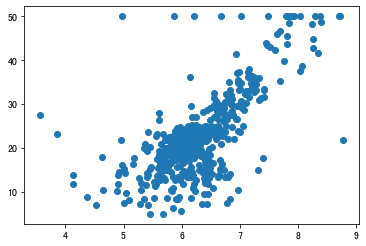

In [20]:
plt.scatter(dataframe['RM'], dataframe['price'])

## f(x) = k*X_rm + b,旨在找到最好的f(x)
## 问题：什么叫做好？
## Loss函数
## 今天课程的loss函数叫做Mean Squared Error:MSE
$$loss(y,\hat{y}) = \frac{1}{N}{\sum_{i \in N}(y_i-\hat{y_i})^2}$$

In [42]:
def loss(y_hat, y):
    return np.mean((np.array(y_hat) - np.array(y)) ** 2)

In [43]:
real_y = [3,6,7]
y_hats_1 = [3,4,7]
y_hats_2 = [3,6,6]

In [44]:
loss(y_hats_1, real_y)

1.3333333333333333

In [45]:
loss(y_hats_2, real_y)

0.3333333333333333

## 问题：有了判断标准，怎样获得最优的k和b呢？
+ 1.直接用微积分的方法做计算

$$ f(rm) = k * rm + b $$ 
$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} (\hat{y_i} - y_i) ^ 2 $$
$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$
loss函数可转化为：$Loss(k, b)=Ak^2+Bk+C+A'b^2+B'b+C'$,极值为：$-\frac{A}{2B},-\frac{A'}{2B'}$

但是函数可能会很复杂，当函数变得极其复杂的时候，用微积分是求不到极值点的
+ 2.随机模拟

In [46]:
import random

In [48]:
min_loss = float('inf') # inf无穷大
best_k, bes_b = None, None

for step in range(1000):
    min_v, max_v = -100, 100
    k, b = random.randrange(min_v, max_v), random.randrange(min_v, max_v)
    y_hats = [k * rm_i  + b for rm_i in X_rm]
    current_loss = loss(y_hats, Y)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('在第{}步，我们获得了函数 f(rm) = {} * rm + {}, 此时loss是: {}'.format(step, k, b, current_loss))

在第0步，我们获得了函数 f(rm) = -60 * rm + -69, 此时loss是: 221992.4172750988
在第1步，我们获得了函数 f(rm) = -54 * rm + -33, 此时loss是: 157953.88124318578
在第2步，我们获得了函数 f(rm) = 18 * rm + 48, 此时loss是: 19289.96636052964
在第3步，我们获得了函数 f(rm) = 14 * rm + 13, 此时loss是: 6210.148070379447
在第26步，我们获得了函数 f(rm) = 4 * rm + -34, 此时loss是: 1042.026267098814
在第59步，我们获得了函数 f(rm) = 14 * rm + -75, 此时loss是: 146.5828529881423
在第152步，我们获得了函数 f(rm) = 13 * rm + -66, 此时loss是: 97.7702097687747
在第245步，我们获得了函数 f(rm) = 11 * rm + -41, 此时loss是: 76.7147642035573
在第373步，我们获得了函数 f(rm) = 13 * rm + -57, 此时loss是: 55.784142575098805
在第512步，我们获得了函数 f(rm) = 14 * rm + -65, 此时loss是: 55.62435496442688


## 我们可以看到，当刚开始的时候，更新会更加的频繁，随着时间的流逝，更新会越来越困难

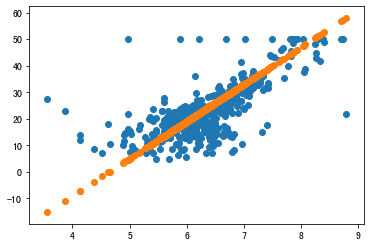

In [52]:
plt.scatter(X_rm, Y)
plt.scatter(X_rm, [best_k * rm + best_b for rm in X_rm])

## How to get better k and b?
+ 3.梯度下降 Gradient Descent
$$ k_{n+1} = k_{n} + (-1)*\frac{\partial{loss(k,b)}}{\partial{k_{n}}}\alpha $$
$$ b_{n+1} = b_{n} + (-1)*\frac{\partial{loss(k,b)}}{\partial{b_{n}}}\alpha $$

#### 其中
$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$

$$ \frac{\partial{loss(k, b)}}{\partial{k}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i) * rm_i $$

$$ \frac{\partial{loss(k, b)}}{\partial{b}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i)$$

## 深度学习的核心：通过梯度下降的方法，获得一组参数，使得loss最小

In [53]:
def partial_k(k, b, x, y):
    return 2 * np.mean((k * x + b - y) * x)

def partial_b(k, b, x, y):
    return 2 * np.mean(k * x + b - y)

k, b = random.random(), random.random()
min_loss = float('inf')
best_k, bes_b = None, None
learning_rate = 1e-2

for step in range(2000):
    k, b = k + (-1 * partial_k(k, b, X_rm, Y) * learning_rate), b + (-1 * partial_b(k, b, X_rm, Y) * learning_rate)
    y_hats = k * X_rm + b
    current_loss = loss(y_hats, Y)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('在第{}步，我们获得了函数 f(rm) = {} * rm + {}, 此时loss是: {}'.format(step, k, b, current_loss))

在第0步，我们获得了函数 f(rm) = 2.978495837236008 * rm + 1.3064103702714776, 此时loss是: 68.36420260486207
在第1步，我们获得了函数 f(rm) = 3.3540291698622893 * rm + 1.3565631421227105, 此时loss是: 59.88889539678889
在第2步，我们获得了函数 f(rm) = 3.4229121790752886 * rm + 1.35851106462052, 此时loss是: 59.60546348905175
在第3步，我们获得了函数 f(rm) = 3.436458648378781 * rm + 1.3517619381002879, 此时loss是: 59.588792431572216
在第4步，我们获得了函数 f(rm) = 3.440019150371641 * rm + 1.3434451019742215, 此时loss是: 59.580811656630495
在第5步，我们获得了函数 f(rm) = 3.441777376452194 * rm + 1.3348470735054652, 此时loss是: 59.57311744570157
在第6步，我们获得了函数 f(rm) = 3.443210106371244 * rm + 1.3262000094443525, 此时loss是: 59.565436141409094
在第7步，我们获得了函数 f(rm) = 3.4445838309773493 * rm + 1.317545802990121, 此时loss是: 59.55775883075386
在第8步，我们获得了函数 f(rm) = 3.445946639669346 * rm + 1.3088920135270086, 此时loss是: 59.55008522177779
在第9步，我们获得了函数 f(rm) = 3.447307210435152 * rm + 1.3002400047657763, 此时loss是: 59.54241530325613
在第10步，我们获得了函数 f(rm) = 3.4486671093166987 * rm + 1.2915900223833443,

## 我们可以看到，基本上每一步都在更新

In [54]:
min_loss

49.721725554054565

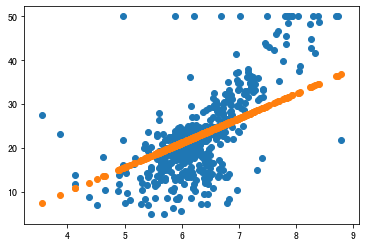

In [56]:
plt.scatter(X_rm, Y)
plt.scatter(X_rm, [best_k * rm + best_b for rm in X_rm])

In [58]:
def partial_k(k, b, x, y):
    return 2 * np.mean((k * x + b - y) * x)

def partial_b(k, b, x, y):
    return 2 * np.mean(k * x + b - y)

k, b = random.random(), random.random()
min_loss = float('inf')
best_k, bes_b = None, None
learning_rate = 1e-2

k_b_history = []

for step in range(2000):
    k, b = k + (-1 * partial_k(k, b, X_rm, Y) * learning_rate), b + (-1 * partial_b(k, b, X_rm, Y) * learning_rate)
    y_hats = k * X_rm + b
    current_loss = loss(y_hats, Y)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        k_b_history.append((best_k, best_b))
#         print('在第{}步，我们获得了函数 f(rm) = {} * rm + {}, 此时loss是: {}'.format(step, k, b, current_loss))

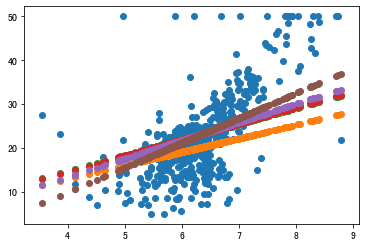

In [60]:
plt.scatter(X_rm, Y)
test = [0,10,100,500,-1]
for i in test:
    plt.scatter(X_rm, k_b_history[i][0]*X_rm+k_b_history[i][1])

## 透视了整个获得k和b的过程

In [62]:
def model(x,k,b):
    return k*x+b

In [73]:
%%time
model(6,best_k, best_b)

CPU times: user 17 µs, sys: 2 µs, total: 19 µs
Wall time: 25 µs


21.182996615629033

In [74]:
%%time
find_price_by_similar(rm_to_price,6)

CPU times: user 896 µs, sys: 0 ns, total: 896 µs
Wall time: 905 µs


20.933333333333334

## 用梯度下降得到的算法，速度比KNN有大大的提升

## Review
+ 1.correlation,salient feature
+ 2.Machine Learing
+ 3.KNN
+ 4.Random Iteration get best k and b (蒙特卡洛模拟)
+ 5.*loss
+ 6.Gradient Descent
+ 7.Performance of Gradient Descent

## Next
+ 1.More complicated function
+ 2.Activation Function
+ 3.Neural Network
+ 4.Deep Learning
+ 5.Back propogation
+ 6.Auto-Back propogation
+ 7.Topological Sorting
+ 8.Auto-Compute Gradient
+ 9.All the elements of a neural Network framework